<a href="https://colab.research.google.com/github/Serendipity-Song/Ecocycle/blob/main/%08ecobyte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
import torchvision
from torchvision import transforms # 이미지 데이터 transform
from torch.utils.data import DataLoader # 이미지 데이터 로더
import os
import glob

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/ecobyte/dataset/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/ecobyte/dataset/test'

can_dir = '/can/'
pet_dir = '/pet/'
banana_dir = '/banana/'
     

In [ ]:
resize_trans = transforms.Compose([
                                   transforms.Resize((128,128)),
                                   transforms.ToTensor()
])

resize_train = torchvision.datasets.ImageFolder(root=train_path, transform=resize_trans)
# resize_test = torchvision.datasets.ImageFolder(root=test_path, transform=resize_trans)

In [ ]:
resize_train[0][0].shape 

torch.Size([3, 128, 128])

In [ ]:
resize_train[0][0]

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [ ]:
import numpy as np
np.mean(resize_train[0][0].numpy(),axis=(1,2))

array([0.98422205, 0.93087494, 0.74833554], dtype=float32)

In [ ]:
def   (dataset):
  meanRGB = [np.mean(image.numpy(), axis=(1,2)) for image,_ in dataset]
  stdRGB = [np.std(image.numpy(), axis=(1,2)) for image,_ in dataset]

  meanR = np.mean([m[0] for m in meanRGB])
  meanG = np.mean([m[1] for m in meanRGB])
  meanB = np.mean([m[2] for m in meanRGB])

  stdR = np.mean([s[0] for s in stdRGB])
  stdG = np.mean([s[1] for s in stdRGB])
  stdB = np.mean([s[2] for s in stdRGB])

  print(meanR, meanG, meanB)
  print(stdR, stdG, stdB)
     

In [ ]:
resize_train_mean=[0.17191947, 0.41128376, 0.56153077]
resize_train_std=[0.16150557, 0.16577946, 0.16063999]

resize_test_mean=[0.15918699, 0.410329, 0.55247366]
resize_test_std=[0.1542138, 0.16098696, 0.15552239]

In [ ]:

transform_train = transforms.Compose([
    transforms.Resize((128, 128)), # 이미지 resize
    transforms.RandomCrop(124), # 이미지를 랜덤으로 크롭
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), # 이미지 지터링(밝기, 대조, 채비, 색조)
    transforms.RandomHorizontalFlip(p = 1), # p확률로 이미지 좌우반전
    transforms.RandomVerticalFlip(p = 1), # p확률로 상하반전
    transforms.ToTensor(),y
    transforms.Normalize(resize_train_mean, resize_train_std)
])

transform_test = transforms.Compose([
    transforms.Resize((128, 128)), 
    transforms.ToTensor(),
    transforms.Normalize(resize_test_mean, resize_test_std)
])

trainset = torchvision.datasets.ImageFolder(root=train_path, transform=transform_train)
# testset = torchvision.datasets.ImageFolder(root=test_path, transform=transform_test)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=0)

# test_loader = torch.utils.data.DataLoader(testset, batch_size=1,
#                                          shuffle=False, num_workers=0)

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape
     

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def imshow(img, mean, std):
    npimg = img.numpy()
    img = np.transpose( npimg, (1, 2, 0) )
    img = img * std + mean # renormalize
    img = img.clip(0, 1)
    plt.imshow(img)
    plt.show()


none_trans = torchvision.datasets.ImageFolder(root=train_path, transform=None)
     

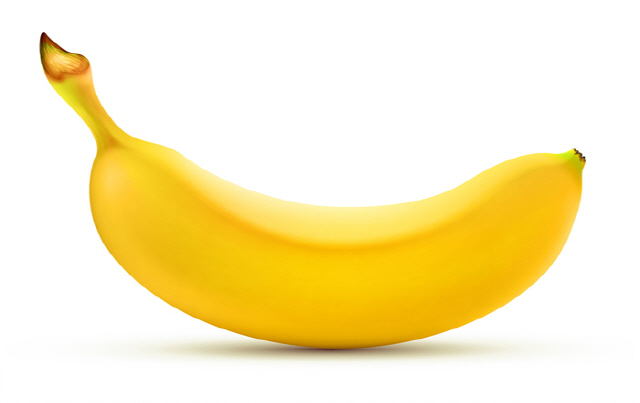

In [ ]:
none_trans[0][0]

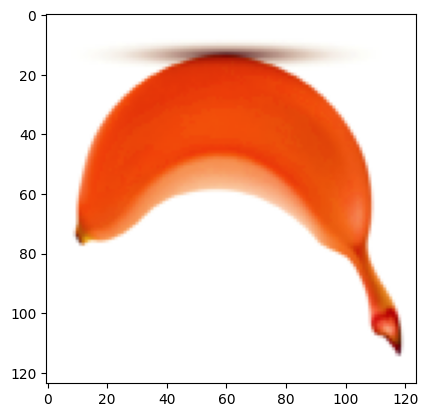

In [ ]:
imshow((trainset[0][0]),resize_train_mean,resize_train_std)
     

I want more dataset to crawl

-> 구글 크롬 드라이버 막혔다.


In [ ]:
pip install beautifulsoup4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup
import os

# Define the directories to save the downloaded images
train_path = '/content/drive/MyDrive/Colab Notebooks/ecobyte/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/ecobyte/test'
can_dir = '/can/'
pet_dir = '/pet/'
banana_dir = '/banana/'

# Define the search queries and the number of images to download for each class
can_query = '음료수 캔'
can_num_images = 100
pet_query = '페트병'
pet_num_images = 100
banana_query = '바나나 껍질'
banana_num_images = 100
bedding_query = '이불'
bedding_num_images = 100

# Create the directories if they don't exist
# if not os.path.exists(train_path):
#     os.makedirs(train_path)
# if not os.path.exists(test_path):
#     os.makedirs(test_path)
# if not os.path.exists(train_path + can_dir):
#     os.makedirs(train_path + can_dir)
# if not os.path.exists(train_path + pet_dir):
#     os.makedirs(train_path + pet_dir)
# if not os.path.exists(train_path + banana_dir):
#     os.makedirs(train_path + banana_dir)
# if not os.path.exists(test_path + can_dir):
#     os.makedirs(test_path + can_dir)
# if not os.path.exists(test_path + pet_dir):
#     os.makedirs(test_path + pet_dir)
# if not os.path.exists(test_path + banana_dir):
#     os.makedirs(test_path + banana_dir)

# Define the base URL and the search query parameters for each class
base_url = 'https://www.google.com/search'
can_params = {'q': can_query, 'tbm': 'isch', 'ijn': '0'}
pet_params = {'q': pet_query, 'tbm': 'isch', 'ijn': '0'}
banana_params = {'q': banana_query, 'tbm': 'isch', 'ijn': '0'}

# Loop through the number of images to download for each class
for i in range(can_num_images // 20):
    # Update the search query parameters for each page of results
    can_params['ijn'] = str(i * 20)
    
    # Send an HTTP request to the Google Images URL with the search query parameters
    response = requests.get(base_url, params=can_params)
    html_content = response.text
    
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Find all image tags that have a src or data-src attribute
    img_tags = soup.find_all('img', attrs={'src': True} or {'data-src': True})
    
    # Download each image and save it to the appropriate directory
    for img_tag in img_tags:
        # Get the URL of the image
        if img_tag.has_attr('src'):
            img_url = img_tag['src']
        else:
            img_url = img_tag['data-src']
        
        # Send an HTTP request to the image URL and get the


In [ ]:
import requests

# Define the search query and the directory name
query = "can"
dirname = "cans"

# Define the Bing search API endpoint and headers
search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"
headers = {"Ocp-Apim-Subscription-Key": "<YOUR_SUBSCRIPTION_KEY>"}

# Send a GET request to the Bing search API with the query
response = requests.get(search_url, headers=headers, params={"q": query})
data = response.json()

# Print out the API response
print(data)

# Download the first 100 images in the search results
for i, image in enumerate(data["value"][:100]):
    try:
        # Download the image and save it to the appropriate directory
        image_url = image["contentUrl"]
        filename = f"{query}_{i}.jpg"
        filepath = f"{dirname}/{filename}"
        response = requests.get(image_url)
        with open(filepath, "wb") as f:
            f.write(response.content)
    except Exception as e:
        print(f"Error downloading {image_url}: {e}")


{'error': {'code': '401', 'message': 'Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource.'}}


KeyError: ignored